In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [56]:
#Data preprocessing: import dataset
company1_train = pd.read_csv('/content/GS_Training.csv')
company1_test = pd.read_csv('/content/GS_Testing.csv')
company2_train = pd.read_csv('/content/JNJ_Training.csv')
company2_test = pd.read_csv('/content/JNJ_Testing.csv')
company3_train = pd.read_csv('/content/JPM_Training.csv')
company3_test = pd.read_csv('/content/JPM_Testing.csv')
company4_train = pd.read_csv('/content/NKE_Training.csv')
company4_test = pd.read_csv('/content/NKE_Testing.csv')
company5_train = pd.read_csv('/content/PFE_Training.csv')
company5_test = pd.read_csv('/content/PFE_Testing.csv')


In [57]:
#Function for calculating FIRST parameter (each day's high - low)
def calculate_high_low_diff(df):
    high_low_values = df["High"] - df["Low"]
    new_df = pd.DataFrame({"Date": df["Date"], "High-Low": high_low_values})
    return new_df


In [58]:
goldman_high_minus_low = calculate_high_low_diff(company1_train)
johnson_high_minus_low = calculate_high_low_diff(company2_train)
jpmorgan_high_minus_low = calculate_high_low_diff(company3_train)
nike_high_minus_low = calculate_high_low_diff(company4_train)
pfizer_high_minus_low = calculate_high_low_diff(company5_train)
print(goldman_high_minus_low)

            Date  High-Low
0     2009-04-06  3.899994
1     2009-04-07  6.190002
2     2009-04-08  5.050003
3     2009-04-09  7.530006
4     2009-04-13  8.770004
...          ...       ...
2007  2017-03-27  6.220001
2008  2017-03-28  4.649994
2009  2017-03-29  2.449997
2010  2017-03-30  2.619995
2011  2017-03-31  2.070007

[2012 rows x 2 columns]


In [59]:
#Function for calculating SECOND parameter (each day's close - open)
def calculate_close_open_diff(df):
    new_df = pd.DataFrame()
    new_df['Date'] = df['Date']
    new_df['Close-Open'] = df['Close'] - df['Open']
    return new_df


In [60]:
#Variable 2
#New DataFrame for each company's Close-Open Variable
goldman_close_minus_open = calculate_close_open_diff(company1_train)
johnson_close_minus_open = calculate_close_open_diff(company2_train)
jpmorgan_close_minus_open = calculate_close_open_diff(company3_train)
nike_close_minus_open = calculate_close_open_diff(company4_train)
pfizer_close_minus_open = calculate_close_open_diff(company5_train)
print(goldman_close_minus_open) 

            Date  Close-Open
0     2009-04-06    0.650002
1     2009-04-07    2.080002
2     2009-04-08   -2.620003
3     2009-04-09    4.540001
4     2009-04-13    7.339996
...          ...         ...
2007  2017-03-27    2.179993
2008  2017-03-28    3.750000
2009  2017-03-29   -0.940002
2010  2017-03-30    1.740005
2011  2017-03-31   -0.809998

[2012 rows x 2 columns]


In [61]:
#Function for calculating 3rd|4th|5th parameters (7|14|21 Day Moving Average) and gets rid of NaN values
def moving_average(dataframe, days):
    #Create a new dataframe with the moving average
    ma_df = pd.DataFrame()
    #ma_df['Date'] = dataframe['Date']
    ma_df['Moving Avg'] = dataframe['Close'].rolling(window=days).mean()

    #Add a column with the date of each week
    ma_df['Date'] = dataframe['Date']
    
    #Remove NaN values
    ma_df = ma_df.dropna()

    return ma_df 

In [62]:
#Variable 3
#New DataFrame for each company's 7 day Moving Average
goldman_7D_movingAverage = moving_average(company1_train, 7)
johnson_7D_movingAverage = moving_average(company2_train, 7)
jpmorgan_7D_movingAverage = moving_average(company3_train, 7)
nike_7D_movingAverage = moving_average(company4_train, 7)
pfizer_7D_movingAverage = moving_average(company5_train, 7)
print(goldman_7D_movingAverage) 

      Moving Avg        Date
6     119.751429  2009-04-15
7     120.400000  2009-04-16
8     121.045714  2009-04-17
9     121.082857  2009-04-20
10    120.515714  2009-04-21
...          ...         ...
2007  233.705715  2017-03-27
2008  231.618572  2017-03-28
2009  229.662857  2017-03-29
2010  229.408572  2017-03-30
2011  229.215714  2017-03-31

[2006 rows x 2 columns]


In [63]:
#Variable 4
#New DataFrame for each company's 14 day Moving Average
goldman_14D_movingAverage = moving_average(company1_train, 14)
johnson_14D_movingAverage = moving_average(company2_train, 14)
jpmorgan_14D_movingAverage = moving_average(company3_train, 14)
nike_14D_movingAverage = moving_average(company4_train, 14)
pfizer_14D_movingAverage = moving_average(company5_train, 14)
print(goldman_14D_movingAverage) 

      Moving Avg        Date
13    120.001429  2009-04-24
14    120.305000  2009-04-27
15    120.632857  2009-04-28
16    121.520714  2009-04-29
17    121.818571  2009-04-30
...          ...         ...
2007  241.115715  2017-03-27
2008  239.622143  2017-03-28
2009  238.070001  2017-03-29
2010  236.844286  2017-03-30
2011  235.527143  2017-03-31

[1999 rows x 2 columns]


In [64]:
#Variable 5
#New DataFrame for each company's 21 day Moving Average
goldman_21D_movingAverage = moving_average(company1_train, 21)
johnson_21D_movingAverage = moving_average(company2_train, 21)
jpmorgan_21D_movingAverage = moving_average(company3_train, 21)
nike_21D_movingAverage = moving_average(company4_train, 21)
pfizer_21D_movingAverage = moving_average(company5_train, 21)
print(goldman_21D_movingAverage)

      Moving Avg        Date
20    122.557619  2009-05-05
21    123.632381  2009-05-06
22    124.472857  2009-05-07
23    125.655714  2009-05-08
24    126.200952  2009-05-11
...          ...         ...
2007  244.408572  2017-03-27
2008  243.456191  2017-03-28
2009  242.522381  2017-03-29
2010  241.499047  2017-03-30
2011  240.482857  2017-03-31

[1992 rows x 2 columns]


In [65]:
#Function for calculating 6th parameter: Std for past 7 days and gets rid of NaN values
def calculate_7day_std_dev(df):
    #Create a new DataFrame with just the date and close columns
    close_df = df[['Date', 'Close']].copy()

    #Calculate the 7-day rolling standard deviation of the closing price
    close_df['7 Day Std Dev'] = close_df['Close'].rolling(window=7).std()

    #Drop the first 6 rows (since we don't have enough data to calculate the 7-day std dev for them)
    close_df = close_df.dropna()

    return close_df 

In [66]:
#Variable 6
#New DataFrame for each company's Past 7 day std
goldman_7D_STD = calculate_7day_std_dev(company1_train)
johnson_7D_STD = calculate_7day_std_dev(company2_train)
jpmorgan_7D_STD = calculate_7day_std_dev(company3_train)
nike_7D_STD = calculate_7day_std_dev(company4_train)
pfizer_7D_STD = calculate_7day_std_dev(company5_train)
print(goldman_7D_STD)

            Date       Close  7 Day Std Dev
6     2009-04-15  121.190002       5.785302
7     2009-04-16  121.190002       5.632117
8     2009-04-17  120.599998       5.303827
9     2009-04-20  115.010002       5.253056
10    2009-04-21  120.360001       5.054612
...          ...         ...            ...
2007  2017-03-27  225.479996       6.859184
2008  2017-03-28  229.330002       5.263134
2009  2017-03-29  228.449997       2.541953
2010  2017-03-30  231.220001       2.221288
2011  2017-03-31  229.720001       2.108751

[2006 rows x 3 columns]


In [67]:
def merge_dataframes(df1, df2, df3, df4, df5, df6, on_column):
    #Merge the first two dataframes
    merged_df = pd.merge(df1, df2, on=on_column)

    #Merge the remaining dataframes
    merged_df = pd.merge(merged_df, df3, on=on_column)
    merged_df = pd.merge(merged_df, df4, on=on_column)
    merged_df = pd.merge(merged_df, df5, on=on_column)
    merged_df = pd.merge(merged_df, df6, on=on_column)

    return merged_df

In [68]:
company1_InputVars = merge_dataframes(goldman_high_minus_low, goldman_close_minus_open, goldman_7D_movingAverage, goldman_14D_movingAverage, goldman_21D_movingAverage, goldman_7D_STD, 'Date')
company2_InputVars = merge_dataframes(johnson_high_minus_low, johnson_close_minus_open, johnson_7D_movingAverage, johnson_14D_movingAverage, johnson_21D_movingAverage, johnson_7D_STD, 'Date')
company3_InputVars = merge_dataframes(jpmorgan_high_minus_low, jpmorgan_close_minus_open, jpmorgan_7D_movingAverage, jpmorgan_14D_movingAverage, jpmorgan_21D_movingAverage, jpmorgan_7D_STD, 'Date')
company4_InputVars = merge_dataframes(nike_high_minus_low, nike_close_minus_open, nike_7D_movingAverage, nike_14D_movingAverage, nike_21D_movingAverage, nike_7D_STD, 'Date')
company5_InputVars = merge_dataframes(pfizer_high_minus_low, pfizer_close_minus_open, pfizer_7D_movingAverage, pfizer_14D_movingAverage, pfizer_21D_movingAverage, pfizer_7D_STD, 'Date')
print(company5_InputVars)

            Date  High-Low  Close-Open  Moving Avg_x  Moving Avg_y  \
0     2009-05-05  0.407969    0.275142     12.945242     12.887639   
1     2009-05-06  0.464896   -0.246680     13.002168     12.888316   
2     2009-05-07  0.550285    0.132827     13.106533     12.888316   
3     2009-05-08  0.246679    0.066414     13.238005     12.943209   
4     2009-05-11  0.303605    0.047438     13.345080     12.985904   
...          ...       ...         ...           ...           ...   
1987  2017-03-27  0.540794    0.417457     32.514231     32.485091   
1988  2017-03-28  0.275142    0.094875     32.492545     32.502033   
1989  2017-03-29  0.322578    0.161290     32.485768     32.521008   
1990  2017-03-30  0.275143    0.151802     32.499322     32.537273   
1991  2017-03-31  0.208729    0.000000     32.464082     32.544049   

      Moving Avg      Close  7 Day Std Dev  
0      12.880636  13.548387       0.332333  
1      12.889672  13.197343       0.337173  
2      12.919038  13.434

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


16/16 [==============================] - 0s 2ms/step
Goldman Sachs: 2.27 0.75% -1.2445


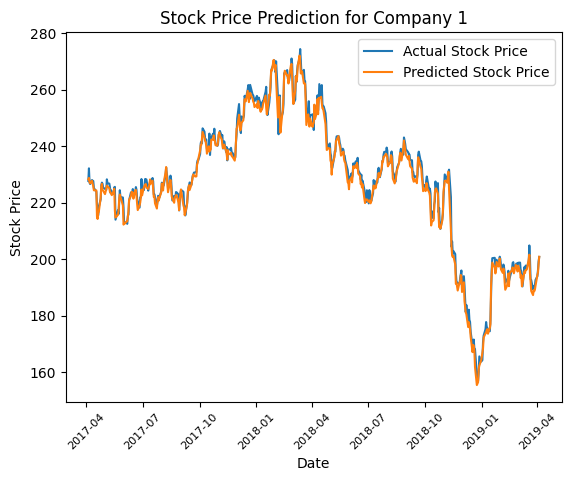

16/16 [==============================] - 0s 1ms/step
Johnson & Johnson: 0.92 0.46% -0.3005


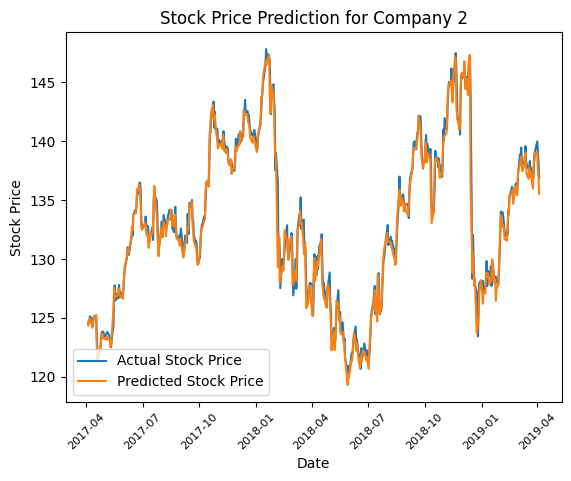

16/16 [==============================] - 0s 2ms/step
JP Morgan and Co.: 0.67 0.47% -0.0426


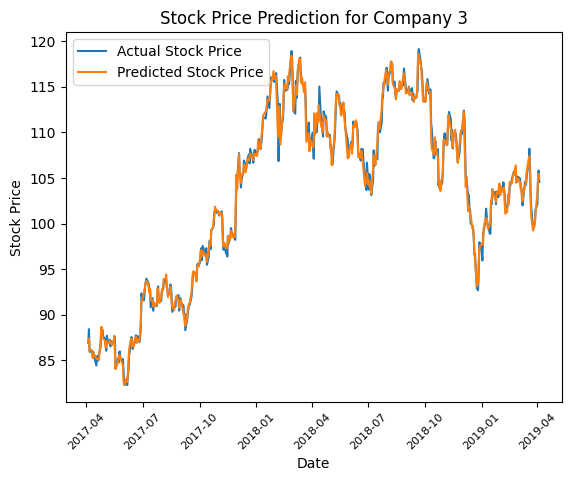

16/16 [==============================] - 0s 2ms/step
Nike: 0.47 0.52% -0.0350


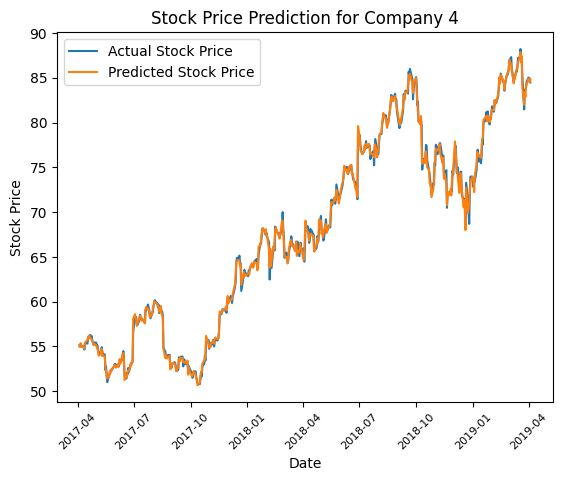

16/16 [==============================] - 0s 2ms/step
Pfizer Inc.: 0.20 0.40% 0.0418


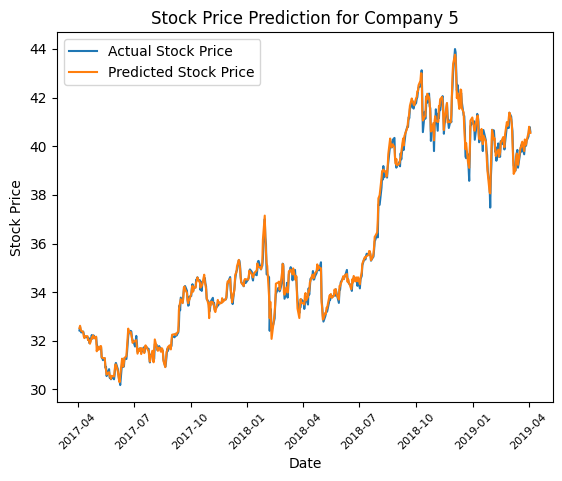

In [69]:
#Set a random seed for reproducibility
np.random.seed(77)

companies = ['Goldman Sachs', 'Johnson & Johnson', 'JP Morgan and Co.', 'Nike', 'Pfizer Inc.']
scaler = StandardScaler()

#Creating the ANN Model
#Creating sequential object to define the layers
classifier = Sequential()

#Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', 
                     input_dim=5))

#Adding the second hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))

#Adding the third hidden layer
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu'))

#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

#Compiling the ANN
classifier.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mae'])

#Iterate over each company's data and train and test model
for i in range(1, 6):
    #Set a random seed for reproducibility
    np.random.seed(77)
    #Selecting training and testing data for current company
    X_train = globals()[f'company{i}_train'].iloc[:, 2:].values
    y_train = globals()[f'company{i}_train'].iloc[:, 1].values
    X_test = globals()[f'company{i}_test'].iloc[:, 2:].values
    y_test = globals()[f'company{i}_test'].iloc[:, 1].values

    #Scaling the input data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Fitting the ANN to the training set
    classifier.fit(X_train_scaled, y_train, batch_size=32, epochs=100, verbose=0)

    #Predicting the test set results
    y_pred = classifier.predict(X_test_scaled)
    y_pred = y_pred.reshape(-1) #reshape to 1D array

    #Calculating the evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mbe = np.mean(y_pred - y_test)

    #Printing the values for each company in the format: Company: RMSE MAPE MBE
    print(f"{companies[i-1]}: {rmse:.2f} {mape:.2f}% {mbe:.4f}")

    #Create datetime objects for x-axis labels
    dates = globals()[f'company{i}_test'].iloc[:, 0].values
    dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

    #Plot actual stock prices and predicted stock prices for current company
    plt.plot(dates, y_test, label='Actual Stock Price')
    plt.plot(dates, y_pred, label='Predicted Stock Price')
    plt.title(f'Stock Price Prediction for Company {i}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45, fontsize=8)
    plt.legend()
    plt.show()



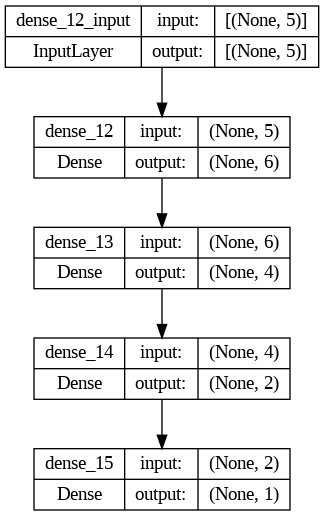

In [70]:
#Plotting tool to visualize ANN Model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
